In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, cos, sin, asin, sqrt
df = pd.read_csv('Acceleration_data.csv')
df2 = pd.read_csv('GPS_data.csv')

In [47]:
def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1,lat1,lon2,lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

import folium 
location_frame = df2[['latitude','longitude']] #Luodaan Pandas data frame, jossa sarakkeina latitudi ja longitudi
location_list = location_frame.values.tolist() #Luodaan framesta lista

ave_lat = np.mean(location_list,axis = 0)[0]
ave_lon = np.mean(location_list,axis = 0)[1]
 

my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)


folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

my_map.save("map.html")

lat = df2['latitude'] #Määritellään parametri lat, joka sisältää latitudin arvot
lon = df2['longitude'] #Määritellään parametri lon, joka sisältää longitudin arvot

df2['dist'] = np.zeros(lat.shape[0]) #Lisätään dataan nollasarake, johon kohta lasketaan pisteiden välinen etäisyys
df2['time_diff']  = np.zeros(lat.shape[0]) #Lisätään dataan nollasarake, johon kohta lasketaan pisteiden välinen aika
df2['Total distance'] = np.zeros(lat.shape[0])#Lisätään sarake kuljetulle matkalle

for i in range(lat.shape[0]-1): #For-luuppi käy läpi datan toiseksi viimeiselle riville saakka
  df2['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #Datan pisteiden i ja i + 1 välimatka metreissä
  df2['time_diff'][i] = df2['seconds_elapsed'][i+1] - df2['seconds_elapsed'][i]  #Peräkkäisten ajanhetkien i ja i+1 välimatka datassa
  df2['Total distance'] = df2['dist'].cumsum()


df2['velocity'] = df2['dist']/df2['time_diff']

df2.head()


C:\Users\simo2\AppData\Local\Temp\ipykernel_6112\355166449.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #Datan pisteiden i ja i + 1 välimatka metreissä
C:\Users\simo2\AppData\Local\Temp\ipykernel_6112\355166449.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time_diff'][i] = df2['seconds_elapsed'][i+1] - df2['seconds_elapsed'][i]  #Peräkkäisten ajanhetkien i ja i+1 välimatka datassa
C:\Users\simo2\AppData\Local\Temp\ipykernel_6112\355166449.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,Total distance,velocity
0,0,3.703666,25.516165,65.071375,3.564172,1.636214,3.564172,2.178305
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,4.374574,2.382686
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,5.545903,1.855274
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,5.775601,0.226845
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,6.497670,0.717928


Text(0, 0.5, 'Velocity')

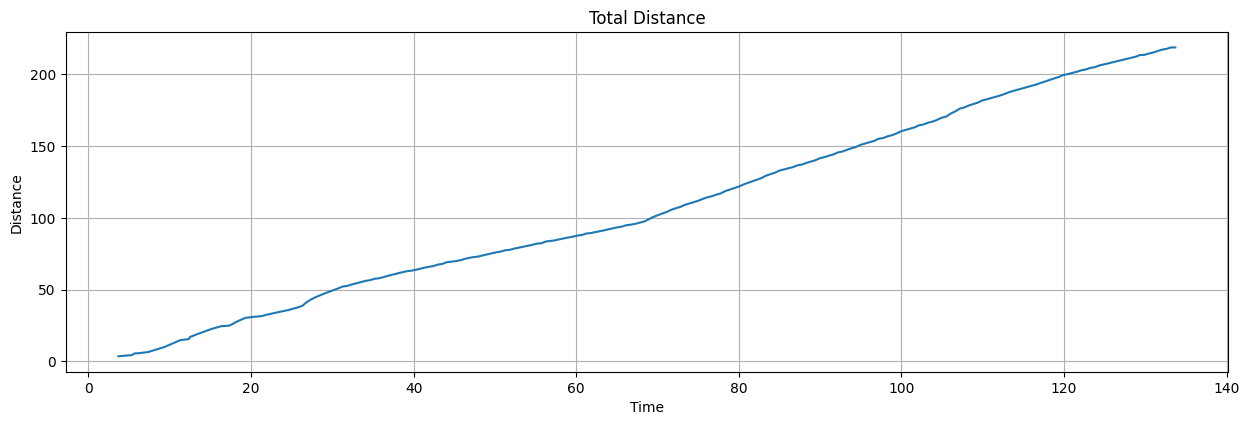

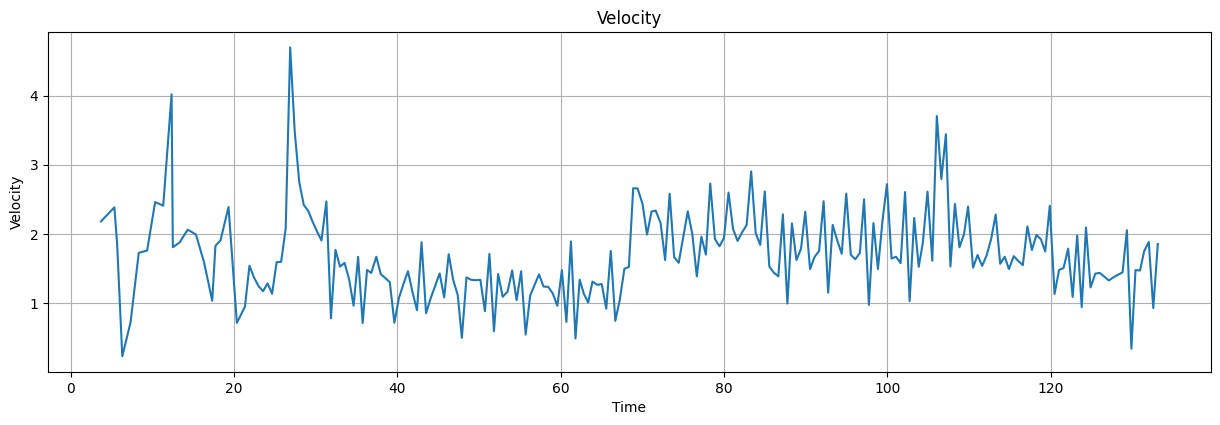

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df2['seconds_elapsed'],df2['Total distance'])
plt.grid()
plt.title('Total Distance')
plt.xlabel('Time')
plt.ylabel('Distance')

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df2['seconds_elapsed'],df2['velocity'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')

In [49]:
x = df['x']
y = df['y']
z = df['z']

df['Total Acceleration(m/s^2)'] = np.zeros(x.shape[0])

for i in range(x.shape[0]):
    df['Total Acceleration(m/s^2)'][i] = np.sqrt(x[i]**2 + y[i]**2 + z[i]**2)

df.head()

C:\Users\simo2\AppData\Local\Temp\ipykernel_6112\2294258388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Acceleration(m/s^2)'][i] = np.sqrt(x[i]**2 + y[i]**2 + z[i]**2)
C:\Users\simo2\AppData\Local\Temp\ipykernel_6112\2294258388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Acceleration(m/s^2)'][i] = np.sqrt(x[i]**2 + y[i]**2 + z[i]**2)
C:\Users\simo2\AppData\Local\Temp\ipykernel_6112\2294258388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Unnamed: 0,seconds_elapsed,z,y,x,Total Acceleration(m/s^2)
0,0,0.143440,-2.846008,-0.581977,-0.468246,2.942399
1,1,0.159217,-2.651466,-0.560432,-0.418557,2.742179
2,2,0.175117,-2.132024,-0.366186,-0.535990,2.228655
3,3,0.190986,-1.023350,-0.041039,-0.522485,1.149748
4,4,0.206763,-0.449766,0.229015,-0.356920,0.618166


Text(0, 0.5, 'Acceleration')

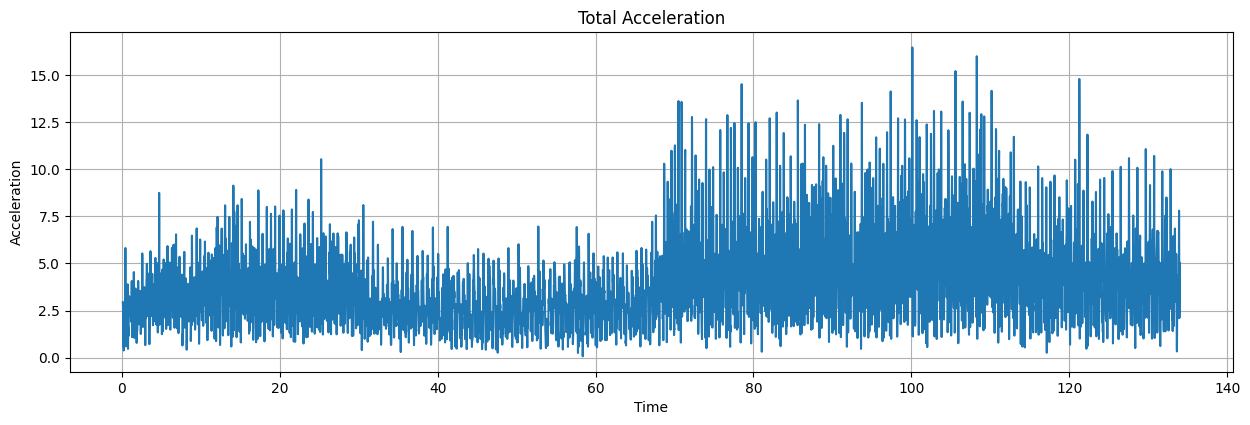

In [50]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df['seconds_elapsed'],df['Total Acceleration(m/s^2)'])
plt.grid()
plt.title('Total Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration')